<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/ML2_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Loading The Data**

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

C_card = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path)

<ipython-input-2-71c1936db49a>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  C_card = kagglehub.load_dataset(


In [3]:
C_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
C_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
C_card.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


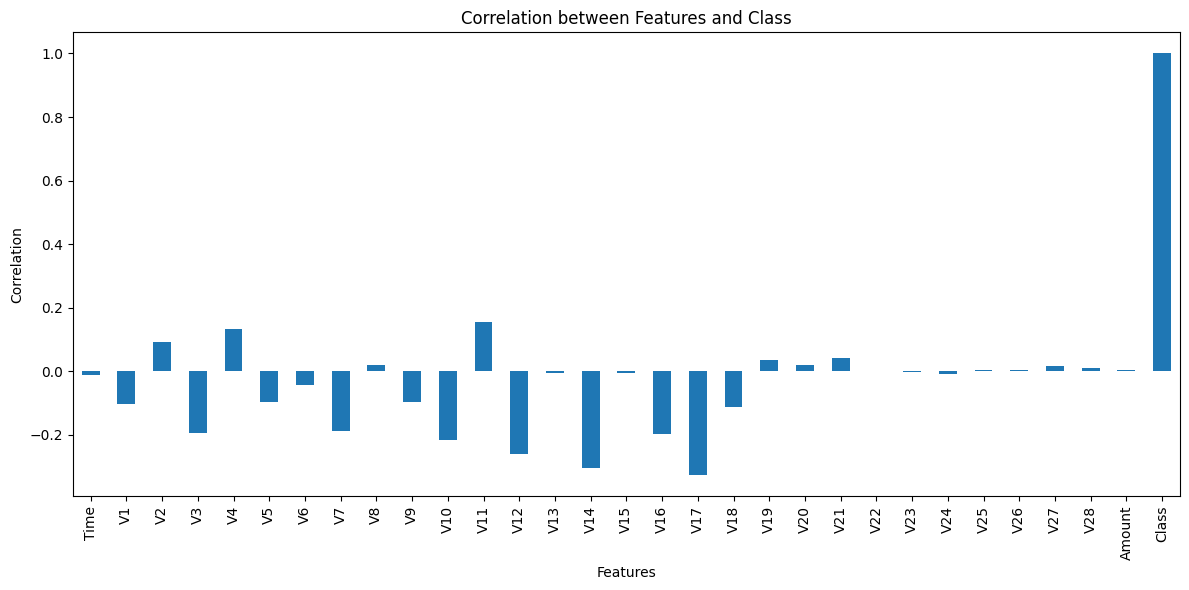

In [6]:
correlation_matrix = C_card.corrwith(C_card['Class'])
plt.figure(figsize=(12, 6))
correlation_matrix.plot(kind='bar')
plt.title('Correlation between Features and Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [7]:
C_card = C_card.drop(['Time'] , axis = 1)
C_card = C_card.drop(['Amount'] , axis = 1)

In [8]:
x = C_card.drop(['Class'], axis=1)
y = C_card['Class']

Class
0    284315
1       492
Name: count, dtype: int64


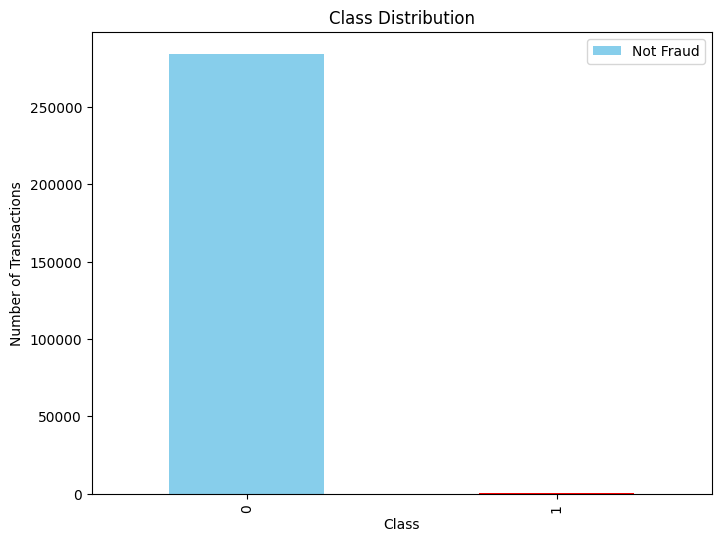

In [9]:
Label_counts = C_card['Class'].value_counts()

print(Label_counts)

plt.figure(figsize=(8, 6))
Label_counts.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(['Not Fraud' , 'Fraud'])
plt.xticks()
plt.show()

In [10]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)
x_balanced = pd.DataFrame(x_resampled, columns=x.columns)
x_balanced['Class'] = y_resampled

Class
0    492
1    492
Name: count, dtype: int64


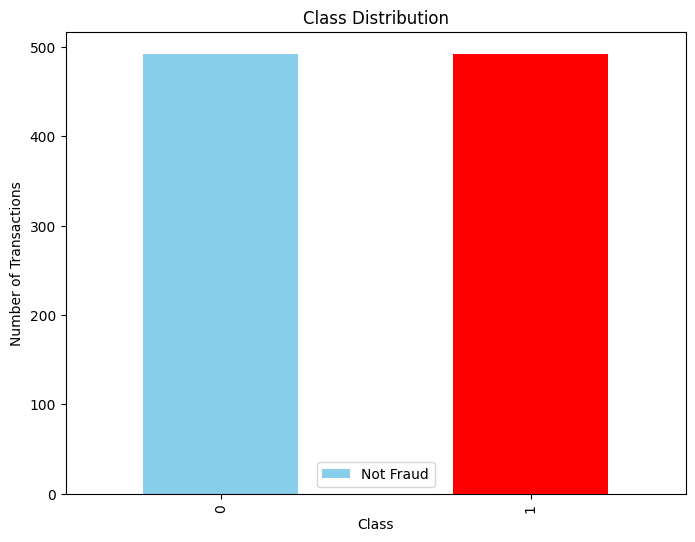

In [11]:
Balanced_Label_counts = x_balanced['Class'].value_counts()

print(Balanced_Label_counts)

plt.figure(figsize=(8, 6))
Balanced_Label_counts.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(['Not Fraud' , 'Fraud'])
plt.xticks()
plt.show()

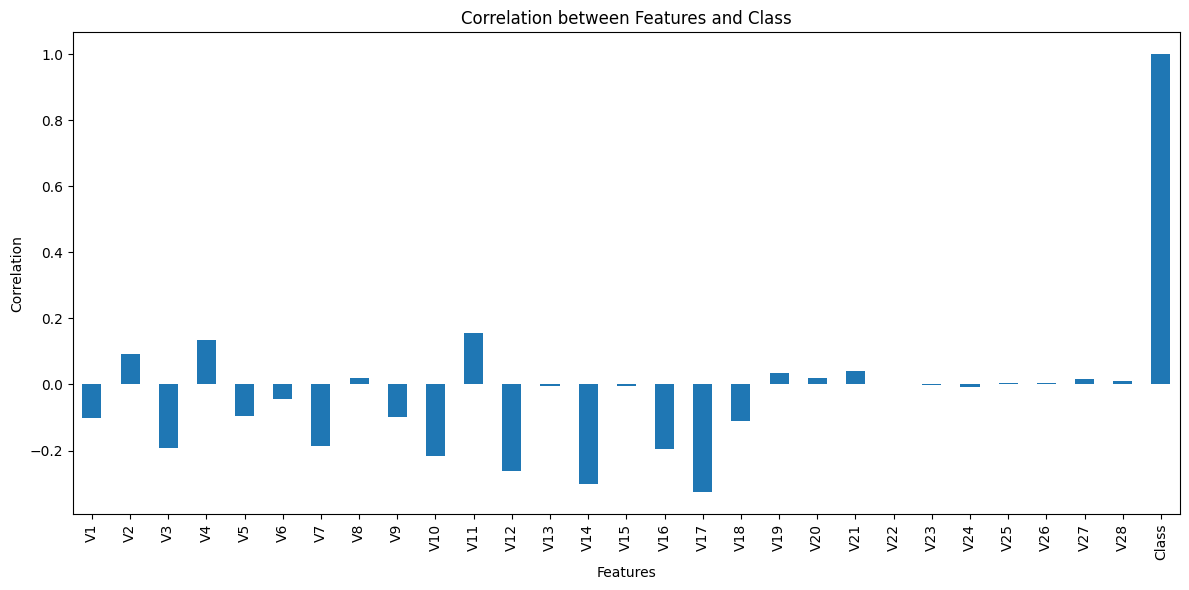

In [12]:
correlation_matrix = C_card.corrwith(C_card['Class'])
plt.figure(figsize=(12, 6))
correlation_matrix.plot(kind='bar')
plt.title('Correlation between Features and Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_resampled)

In [15]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(x_scaled)

the minimum number of components preserving 90–95% variance: 16


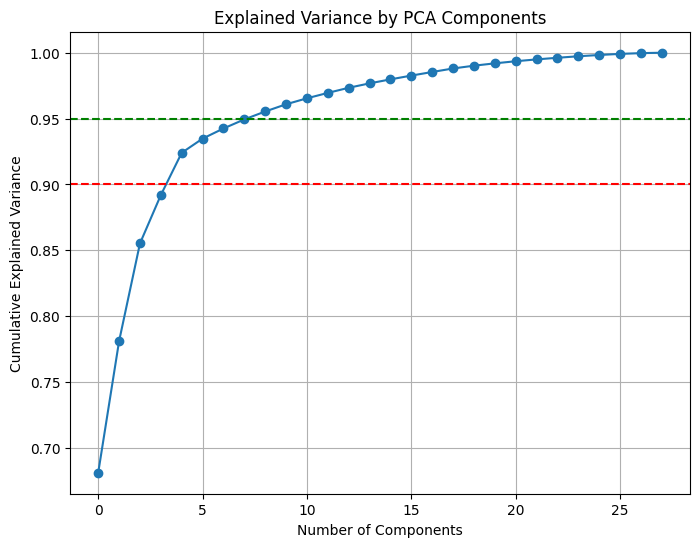

In [17]:
pca = PCA()
X_pca = pca.fit_transform(x_resampled)
# cv = cumulative_variance
cv = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cv, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

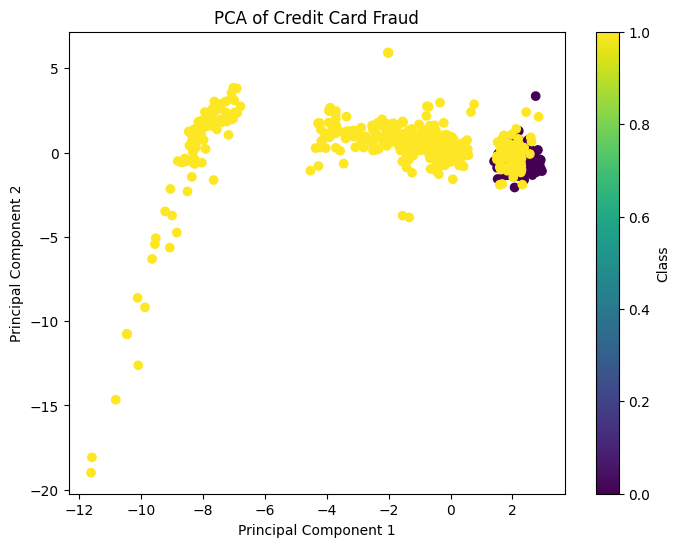

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_resampled)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Credit Card Fraud')
plt.colorbar(label='Class')
plt.show()

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_pca_reduced)
cluster_labels = kmeans.labels_
#t-SNE before clustering
tsne = TSNE(n_components=2, random_state=42)
x_tsne_before = tsne.fit_transform(x_scaled)

#t-SNE after clustering
x_tsne_after = tsne.fit_transform(x_pca_reduced)

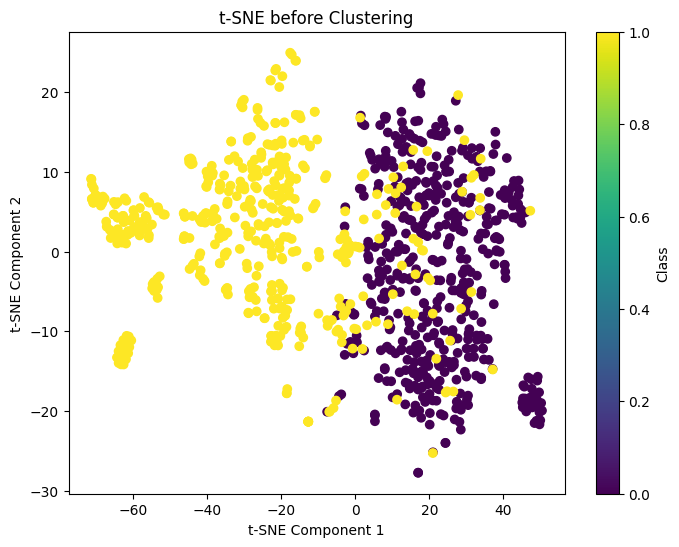

In [20]:
#t-SNE before clustering
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_before[:, 0], x_tsne_before[:, 1], c=y_resampled)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE before Clustering')
plt.colorbar(label='Class')
plt.show()

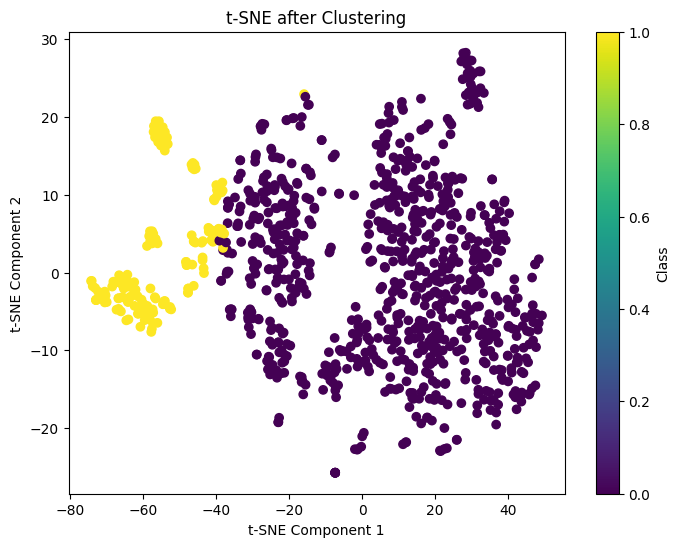

In [21]:
#t-SNE after clustering
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_after[:, 0], x_tsne_after[:, 1], c=cluster_labels)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE after Clustering')
plt.colorbar(label='Class')
plt.show()

In [22]:
from sklearn.metrics import silhouette_score, silhouette_samples
inertia = []
sil_avg = []
k_range = range (2,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(x_pca_reduced)
  inertia.append(kmeans.inertia_)
  sil_avg.append(silhouette_score(x_pca_reduced, labels))

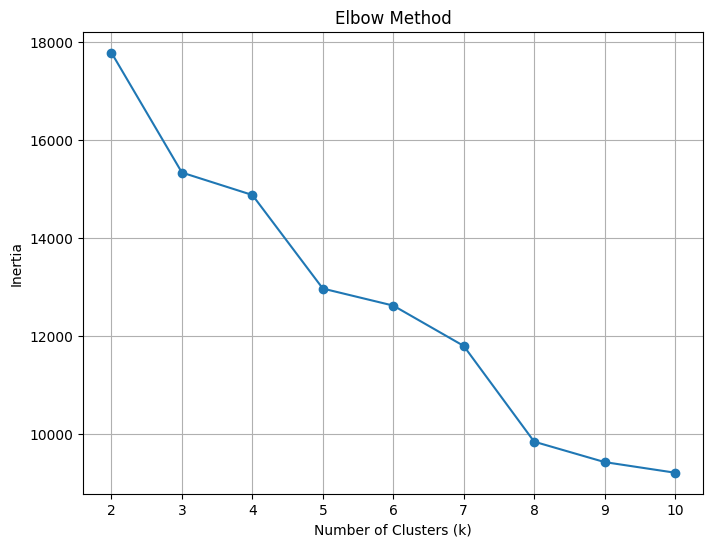

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

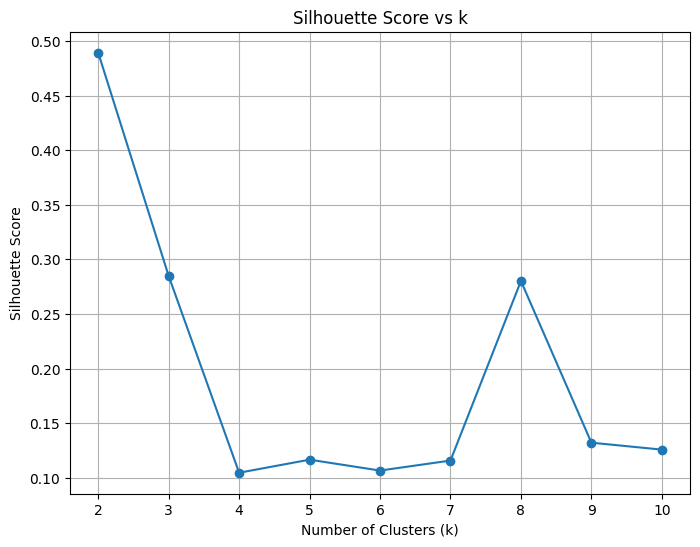

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, sil_avg, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid()
plt.show()

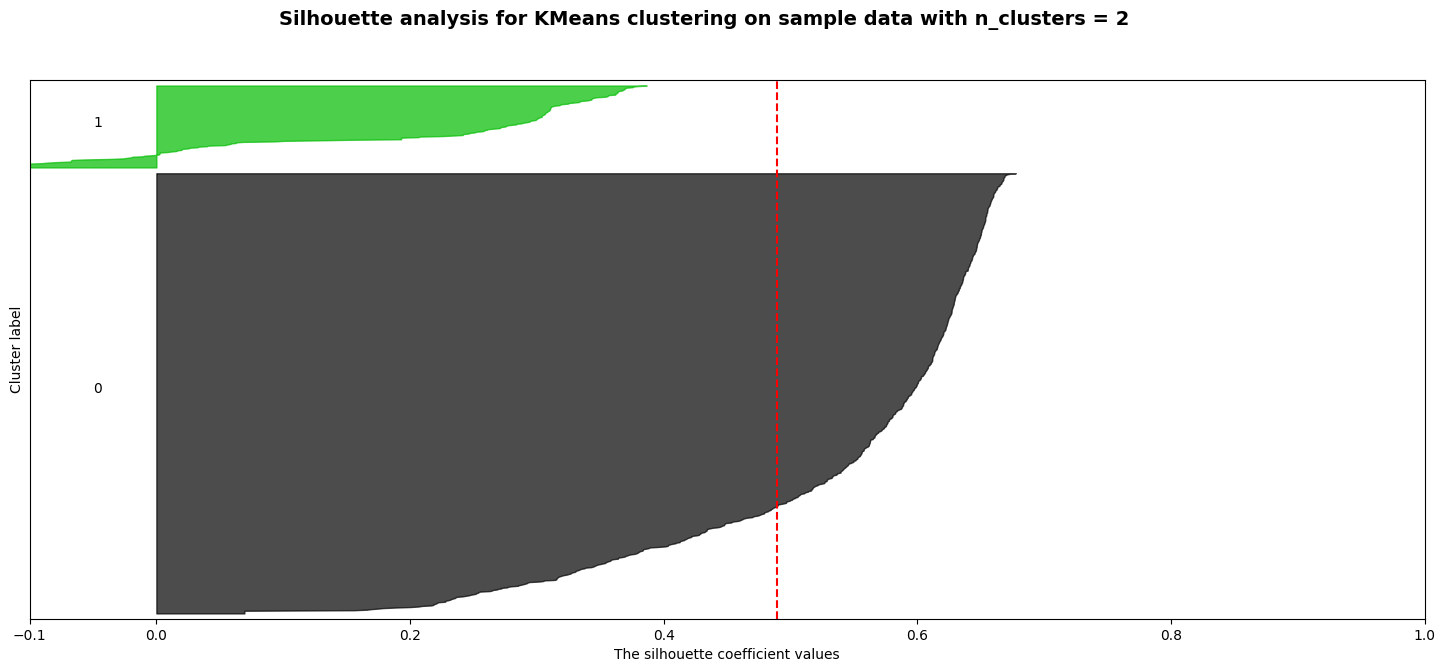

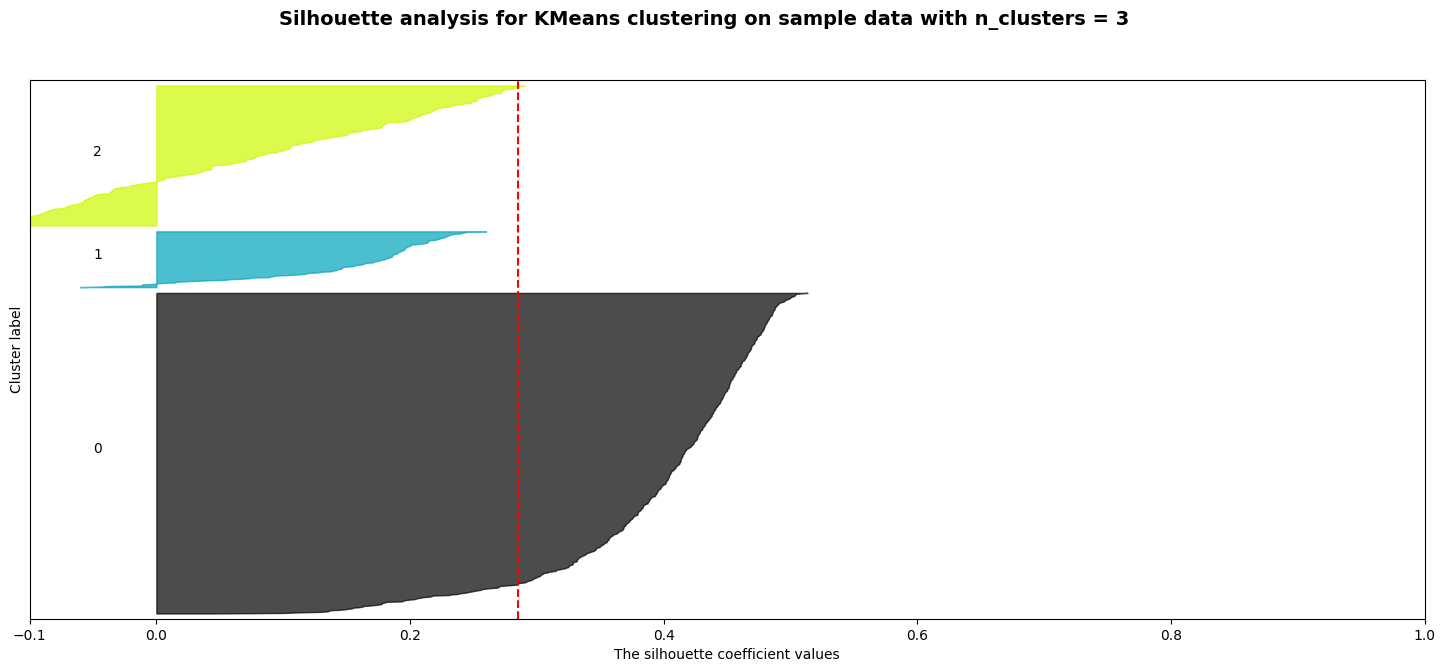

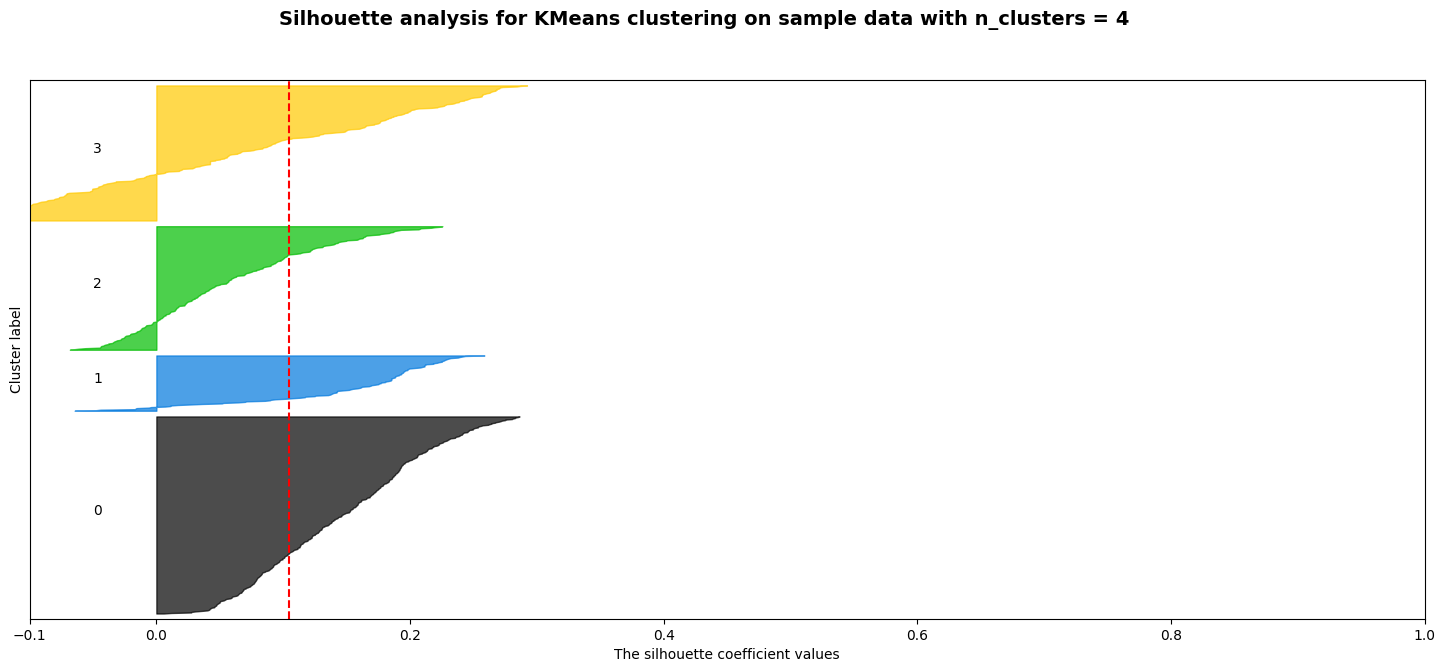

In [25]:
import matplotlib.cm as cm
for n_clusters in [2, 3, 4]:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # lie within [-0.1, 1] because of the standard scaler
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    ax1.set_ylim([0, len(x_pca_reduced) + (n_clusters + 1) * 10])

    cluster = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster.fit_predict(x_pca_reduced)
    sil_avg = silhouette_score(x_pca_reduced , cluster_labels)
    sample_sil_values = silhouette_samples(x_pca_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_sil_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower , y_upper) , 0 , ith_cluster_silhouette_values , facecolor=color , edgecolor = color , alpha = 0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=sil_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)

    plt.show()
